- 트위터 데이터, 대통령 선거 관련 댓글 데이터
> 차기 대통령 선호도 조사 관련 트윗 데이터
- 데이터에서 한글만 추출
- 대통령 후보(문재인, 이재명, 이낙연) 이름만 추출하여 카운팅, 얼마나 언급이 되었는지 체크

In [1]:
import re
import pandas as pd

In [2]:
df = pd.read_csv('tweet_jae.csv', encoding = 'utf-8')

In [3]:
df.head()

,status_id,screen_name,created_at,text
0,1295242650363154433,park_pyung,2020-08-17 06:14:46,-&gt; (지난 7개월 동안은 엎치락뒤치락 안 했는데?) 본격화되지 않았던 것\n...
1,1294137207121297409,Otranso2,2020-08-14 05:02:08,"""차기선호도 이재명 19% 이낙연 17%…첫 역전""(종합)https://t.co/n..."
2,1294285873027014656,hyoker3690,2020-08-14 14:52:53,"안철수 시즌2라~~~ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ [‘이낙연 대세론’ 흔들…이재명,..."
3,1294154164272939009,hyoker3690,2020-08-14 06:09:31,조작미터도 모자라 갤럽까지 제대로 미쳤군.\n대통령과 당 지지율이 떨어졌는데\n이재...
4,1294092935877652480,Sunny38251,2020-08-14 02:06:13,@yonhaptweet SNS로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이...


### 한글만 추출

In [4]:
#한글 및 공백문자만 추출
for i, j in enumerate(df['text']):
    df.loc[i, 'text_kr'] = re.sub('[^가-힣 ]', '', j)

In [5]:
df.head() #한글만 추출된 데이터 확인

,status_id,screen_name,created_at,text,text_kr
0,1295242650363154433,park_pyung,2020-08-17 06:14:46,-&gt; (지난 7개월 동안은 엎치락뒤치락 안 했는데?) 본격화되지 않았던 것\n...,지난 개월 동안은 엎치락뒤치락 안 했는데 본격화되지 않았던 것 이재명은 적극적인 ...
1,1294137207121297409,Otranso2,2020-08-14 05:02:08,"""차기선호도 이재명 19% 이낙연 17%…첫 역전""(종합)https://t.co/n...",차기선호도 이재명 이낙연 첫 역전종합
2,1294285873027014656,hyoker3690,2020-08-14 14:52:53,"안철수 시즌2라~~~ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ [‘이낙연 대세론’ 흔들…이재명,...",안철수 시즌라 이낙연 대세론 흔들이재명 여권 추락 속 홀로 날
3,1294154164272939009,hyoker3690,2020-08-14 06:09:31,조작미터도 모자라 갤럽까지 제대로 미쳤군.\n대통령과 당 지지율이 떨어졌는데\n이재...,조작미터도 모자라 갤럽까지 제대로 미쳤군대통령과 당 지지율이 떨어졌는데이재명만 오른...
4,1294092935877652480,Sunny38251,2020-08-14 02:06:13,@yonhaptweet SNS로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이...,로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이낙연당연히 이낙연 아닌가전 ...


### 언급 횟수 카운트

In [6]:
import numpy as np

df['jaemyung'] = np.nan
df['jaein'] = np.nan
df['nakyon'] = np.nan

In [7]:
#후보 언급 횟수 카운팅
for i, j in enumerate(df['text_kr']):
    if len(re.findall("이재명", j)) >= 1:
        df.loc[i, 'jaemyung'] = 1
    else:
        df.loc[i, 'jaemyung'] = 0
        
    if len(re.findall("문재인", j)) >= 1:
        df.loc[i, 'jaein'] = 1
    else:
        df.loc[i, 'jaein'] = 0
        
    if len(re.findall("이낙연", j)) >= 1:
        df.loc[i, 'nakyon'] = 1
    else:
        df.loc[i, 'nakyon'] = 0

In [8]:
df.head()

,status_id,screen_name,created_at,text,text_kr,jaemyung,jaein,nakyon
0,1295242650363154433,park_pyung,2020-08-17 06:14:46,-&gt; (지난 7개월 동안은 엎치락뒤치락 안 했는데?) 본격화되지 않았던 것\n...,지난 개월 동안은 엎치락뒤치락 안 했는데 본격화되지 않았던 것 이재명은 적극적인 ...,1.0,0.0,1.0
1,1294137207121297409,Otranso2,2020-08-14 05:02:08,"""차기선호도 이재명 19% 이낙연 17%…첫 역전""(종합)https://t.co/n...",차기선호도 이재명 이낙연 첫 역전종합,1.0,0.0,1.0
2,1294285873027014656,hyoker3690,2020-08-14 14:52:53,"안철수 시즌2라~~~ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ [‘이낙연 대세론’ 흔들…이재명,...",안철수 시즌라 이낙연 대세론 흔들이재명 여권 추락 속 홀로 날,1.0,0.0,1.0
3,1294154164272939009,hyoker3690,2020-08-14 06:09:31,조작미터도 모자라 갤럽까지 제대로 미쳤군.\n대통령과 당 지지율이 떨어졌는데\n이재...,조작미터도 모자라 갤럽까지 제대로 미쳤군대통령과 당 지지율이 떨어졌는데이재명만 오른...,1.0,0.0,1.0
4,1294092935877652480,Sunny38251,2020-08-14 02:06:13,@yonhaptweet SNS로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이...,로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이낙연당연히 이낙연 아닌가전 ...,1.0,0.0,1.0


In [9]:
#후보 언급 횟수 확인
print("문재인 언급 횟수 : ", sum(df['jaein']))
print("이재명 언급 횟수 : ", sum(df['jaemyung']))
print("이낙연 언급 횟수 : ", sum(df['nakyon']))

문재인 언급 횟수 :  325.0
이재명 언급 횟수 :  8566.0
이낙연 언급 횟수 :  1037.0


In [10]:
df[((df['text'].str.contains("대통령님")) | (df['text'].str.contains("문통")) | (df['text'].str.contains("문프"))) & 
   (df['jaein'] == 0)] #'문재인' 대신 '대통령님','문통','문프'이라고 언급한 경우 확인

,status_id,screen_name,created_at,text,text_kr,jaemyung,jaein,nakyon
12,1296261986204831745,thelaziest,2020-08-20 01:45:15,@nylee21 요즘 이재명 지지자란 것들이 이낙연 의원님에 대한 흑색선전 퍼뜨리고...,요즘 이재명 지지자란 것들이 이낙연 의원님에 대한 흑색선전 퍼뜨리고 다닙니다대통령...,1.0,0.0,1.0
16,1294507633898999808,tallbluebird,2020-08-15 05:34:05,이거만 봐도 안다 누가 사이다냐?\n광복절에 아베 때리는거? 그거 누구나\n할 수 ...,이거만 봐도 안다 누가 사이다냐광복절에 아베 때리는거 그거 누구나할 수 있는 말아냐...,1.0,0.0,1.0
21,1294213062124163072,muncan76,2020-08-14 10:03:33,정말 당과 대통령님을 위한다면 이 모든 책임을 이해찬에게 돌리고(사실이 그렇고) 이...,정말 당과 대통령님을 위한다면 이 모든 책임을 이해찬에게 돌리고사실이 그렇고 이낙연...,1.0,0.0,1.0
31,1296684131208663042,someday0912,2020-08-21 05:42:42,@Hbzfv0uSJMwNcPF 항상 웃기는거는 문프님-민주당-이낙연의원님 지지율이 ...,항상 웃기는거는 문프님민주당이낙연의원님 지지율이 같이 움직일때 이재명은 통합당지지...,1.0,0.0,1.0
36,1295634539503448068,someday0912,2020-08-18 08:12:00,"@lsh4u 전 민주당이 통합당같은 짓만하면서, 이낙연의원님 버리고, 되먹지도 못한...",전 민주당이 통합당같은 짓만하면서 이낙연의원님 버리고 되먹지도 못한 이재명을 차기...,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
8270,1294106873314963456,pretty624118,2020-08-14 03:01:36,@choonlyone1 예전에 문프 행동하나하나 트집잡고 조롱하던 찢베가 생각나고....,예전에 문프 행동하나하나 트집잡고 조롱하던 찢베가 생각나고너도 이재명 닮아가냐안 ...,1.0,0.0,0.0
8374,1294043767612162048,micro8032,2020-08-13 22:50:51,@TheMinjoo_Kr 내부총질 좀 그만해 니네 경기도른지사 하루가멀다하고정부욕하...,내부총질 좀 그만해 니네 경기도른지사 하루가멀다하고정부욕하는거 미통당같다 니들이 ...,1.0,0.0,0.0
8416,1293907741434507264,U1KNoG816Zi5WRN,2020-08-13 13:50:19,@yky2015 대통령님은 수해현장을 돌아보며 너무 힘들게 일하시는데 도지사라는 X...,대통령님은 수해현장을 돌아보며 너무 힘들게 일하시는데 도지사라는 과 시원한곳에 앉...,1.0,0.0,0.0
8425,1293898135970840577,jju57056330,2020-08-13 13:12:09,@sadowung @cesarkim2002 @U1KNoG816Zi5WRN @nyle...,문대통령님 보다 뛰어나다고요그런 심한 말 하지마세여 진짜 능력없는 사람이 ...,1.0,0.0,0.0


In [11]:
df[((df['text'].str.contains("지사")) | (df['text'].str.contains("도지사"))) & (df['jaemyung'] == 0)] 
#'이재명' 대신 ''지사' '도지사'라고 언급한 경우 확인: 없음

,status_id,screen_name,created_at,text,text_kr,jaemyung,jaein,nakyon


In [12]:
df[(df['text'].str.contains("당대표")) & (df['nakyon'] == 0)] 
#'이낙연' 대신 '당대표'라고 언급한 경우 확인: 이낙연과는 무관한 트윗인 경우 다수

,status_id,screen_name,created_at,text,text_kr,jaemyung,jaein,nakyon
1403,1296727930488283136,xkiEyVUcYXpDMbp,2020-08-21 08:36:45,@ms2030 이재명한테 쪼인트까였나? 당대표바뀌기전에 정부돈 받아내라고? 바...,이재명한테 쪼인트까였나 당대표바뀌기전에 정부돈 받아내라고 바역거부자들 엄발할...,1.0,0.0,0.0
1429,1296802892611874816,lanotte702,2020-08-21 13:34:37,@yoeman6310 미쳤구만 \n재원이 남아도냐\n국민들은 걱정이 크구만\n\n무...,미쳤구만 재원이 남아도냐국민들은 걱정이 크구만무책임한 이런 인간이 무슨 당대표 후...,1.0,0.0,0.0
2424,1296328293214384129,babonews,2020-08-20 06:08:44,이번 민주당 전당대회 당대표및 최고위원 후보중에서 반드시 '비토' 해야할 자는 이재...,이번 민주당 전당대회 당대표및 최고위원 후보중에서 반드시 비토 해야할 자는 이재명과...,1.0,0.0,0.0
2632,1296746465977458694,onion97,2020-08-21 09:50:24,@yoeman6310 이재명이 1인당 30이라고 구체적 금액까지 정해서 떠들던데 지...,이재명이 인당 이라고 구체적 금액까지 정해서 떠들던데 지령 받고 움직이는 겁니까 ...,1.0,0.0,0.0
2955,1296716368851513344,blue2011man,2020-08-21 07:50:48,당대표 선거 끝나고 말하세요. 괜한 오해사지 말고. 천한 이재명보다 먼저 말하세요....,당대표 선거 끝나고 말하세요 괜한 오해사지 말고 천한 이재명보다 먼저 말하세요 찢빠...,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
8200,1293758100621557760,tlalsk,2020-08-13 03:55:42,"이해찬 당대표 아래에서 수석최고위원,\n박주민 너는 뭐했니?\n쓰레기들 공천될때 박...",이해찬 당대표 아래에서 수석최고위원박주민 너는 뭐했니쓰레기들 공천될때 박주민은 무슨...,1.0,0.0,0.0
8240,1294121524614402048,fakemommy,2020-08-14 03:59:49,추대론이니 7개월 단기 당대표니 한심한 소리 해대니까 바로 지지율이 빠지지. 한국 ...,추대론이니 개월 단기 당대표니 한심한 소리 해대니까 바로 지지율이 빠지지 한국 대통...,1.0,0.0,0.0
8302,1294096743617794049,thm_lee,2020-08-14 02:21:21,@director_drbkim 허걱?!?\n이재명 지사가 당대표에 출마했다고?,허걱이재명 지사가 당대표에 출마했다고,1.0,0.0,0.0
8349,1294079022712799232,babypengbell,2020-08-14 01:10:56,이렇게 된 이상 이재명이 싫어한다는 박주민 당대표 가자,이렇게 된 이상 이재명이 싫어한다는 박주민 당대표 가자,1.0,0.0,0.0


In [13]:
for i, j in enumerate(df['text_kr']): #문통, 문프, 대통령님이 언급된 경우 jaein 열에 1 추가
    if (("대통령님" in j) or ("문통" in j) or ("문프" in j)) and (df.loc[i, 'jaein'] == 0):
        df.loc[i, 'jaein'] = 1

In [14]:
#수정 이후 언급 횟수 확인
print("문재인 언급 횟수 : ", sum(df['jaein']))
print("이재명 언급 횟수 : ", sum(df['jaemyung']))
print("이낙연 언급 횟수 : ", sum(df['nakyon']))

문재인 언급 횟수 :  511.0
이재명 언급 횟수 :  8566.0
이낙연 언급 횟수 :  1037.0


### 추가 분석
- 해당 후보의 댓글들이 어떤 식의 문장이 많이 들어가 있는지 추가 분석

#### 전처리: 불용어, 한글자 단어 제거 등

In [15]:
df.isna().sum() #원본 데이터에 결측값 없는 것 확인

status_id      0
screen_name    0
created_at     0
text           0
text_kr        0
jaemyung       0
jaein          0
nakyon         0
dtype: int64

In [16]:
jaemyung = df[df['jaemyung'] > 0] #이재명이 언급된 댓글만 따로 데이터프레임으로 저장
jaein = df[df['jaein'] > 0] #문재인이 언급된 댓글만 따로 데이터프레임으로 저장
nakyon = df[df['nakyon'] > 0] #이낙연이 언급된 댓글만 따로 데이터프레임으로 저장

In [17]:
from konlpy.tag import Okt
from collections import Counter

okt = Okt() #형태소 추출

In [18]:
#문재인을 언급한 경우의 트윗 말뭉치로 만들기
moon = "".join(jaein['text_kr'].tolist())
moon[:100]

'이재명 지지자건 이낙연 지지자건문재인이 뭐 물렀느니 어쩌니 요즘 이재명 지지자란 것들이 이낙연 의원님에 대한 흑색선전 퍼뜨리고 다닙니다대통령님 정부에 총질해대는건 말할것도 없구요 '

In [19]:
#이재명을 언급한 경우의 트윗 말뭉치로 만들기
leej = "".join(jaemyung['text_kr'].tolist())
leej[:100]

' 지난 개월 동안은 엎치락뒤치락 안 했는데 본격화되지 않았던 것 이재명은 적극적인 행보 이낙연은 신중한 행보인데 최근 현안에 대한 태도를 한번 잘 보라참고 사랑제일교회 전목사 관련'

In [20]:
#이낙연을 언급한 경우의 트윗 말뭉치로 만들기
leen = "".join(nakyon['text_kr'].tolist())
leen[:100]

' 지난 개월 동안은 엎치락뒤치락 안 했는데 본격화되지 않았던 것 이재명은 적극적인 행보 이낙연은 신중한 행보인데 최근 현안에 대한 태도를 한번 잘 보라참고 사랑제일교회 전목사 관련'

In [24]:
# 댓글 형태소 분석: 각 단어와 단어의 형태소 저장
moon = okt.pos(moon)
leej = okt.pos(leej)
leen = okt.pos(leen)

In [26]:
def noun_adj_verb(candidate):
    result = []
    for i in candidate: #명사, 형용사, 동사만 따로 저장
        for j in ["Noun", "Adjective", "Verb"]:
            if i[1] == j:
                result.append(i[0])
    return result

In [28]:
# 사용자 함수 각 후보 말뭉치에 적용
moon_tweet = noun_adj_verb(moon)
leej_tweet = noun_adj_verb(leej)
leen_tweet = noun_adj_verb(leen)

In [29]:
# 문재인 말뭉치의 상위 20개 단어 확인
Counter(moon_tweet).most_common(20)

[('이재명', 681),
 ('문재인', 369),
 ('대통령', 226),
 ('민주당', 183),
 ('이낙연', 163),
 ('지지율', 124),
 ('하는', 115),
 ('것', 106),
 ('정부', 87),
 ('통', 87),
 ('사람', 77),
 ('할', 65),
 ('문프', 65),
 ('지지', 61),
 ('국민', 59),
 ('지지자', 55),
 ('그', 54),
 ('이해찬', 53),
 ('미', 53),
 ('이', 51)]

In [30]:
# 이재명 말뭉치의 상위 20개 단어 확인
Counter(leej_tweet).most_common(20)

[('이재명', 10399),
 ('이낙연', 1240),
 ('것', 1110),
 ('민주당', 1027),
 ('지사', 1024),
 ('하는', 987),
 ('경기도', 981),
 ('지지율', 815),
 ('대통령', 718),
 ('사람', 686),
 ('국민', 660),
 ('말', 613),
 ('위', 581),
 ('후보', 578),
 ('할', 552),
 ('거', 530),
 ('코로나', 526),
 ('통', 523),
 ('그', 511),
 ('대선', 484)]

In [31]:
# 이낙연 말뭉치의 상위 20개 단어 확인
Counter(leen_tweet).most_common(20)

[('이재명', 1439),
 ('이낙연', 1240),
 ('후보', 281),
 ('지지율', 270),
 ('위', 270),
 ('차기', 248),
 ('대권', 239),
 ('대선', 235),
 ('민주당', 233),
 ('대통령', 195),
 ('역전', 178),
 ('선호', 173),
 ('주자', 164),
 ('것', 143),
 ('사람', 140),
 ('첫', 137),
 ('의원', 125),
 ('행정', 108),
 ('지지', 104),
 ('된', 103)]

인물에 관계없이 이재명이 가장 많이 언급된 것을 확인할 수 있습니다.

보다 의미있는 분석을 위해 한 글자 키워드와 불용어를 제거할 필요가 있습니다.

In [61]:
#ranks nl의 불용어 사전 활용
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10] #불용어 확인

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [62]:
# 분석가가 정한 불용어 추가
my_stopwords = ["선거", "후보", "주자", "투표", "차기", "대선", "대권", "여론조사", "선호도"]
for w in my_stopwords:
    stopwords.append(w)

In [63]:
def clean_text(txt):
    data = [x for x in txt if len(x) > 1] #한 글자 키워드 제거
    result = [x for x in data if x not in stopwords] #불용어 제거
    return result

In [64]:
# 각 말뭉치에 사용자 정의 함수 적용
moon_tweet = clean_text(moon_tweet)
leej_tweet = clean_text(leej_tweet)
leen_tweet = clean_text(leen_tweet)

#### 인물별 댓글 시각화: 워드클라우드
- 참고: https://doitgrow.com/34

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

In [66]:
# 단어별 빈도수 형태의 딕셔너리 저장
moon_word = Counter(moon_tweet)
leej_word = Counter(leej_tweet)
leen_word = Counter(leen_tweet)a

In [67]:
#폰트 및 워드클라우드 설정
wc = WordCloud(font_path = r"C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\SCDream5.otf", 
               background_color = 'white', width = 800, height = 800, 
               scale = 2.0, max_font_size = 300)

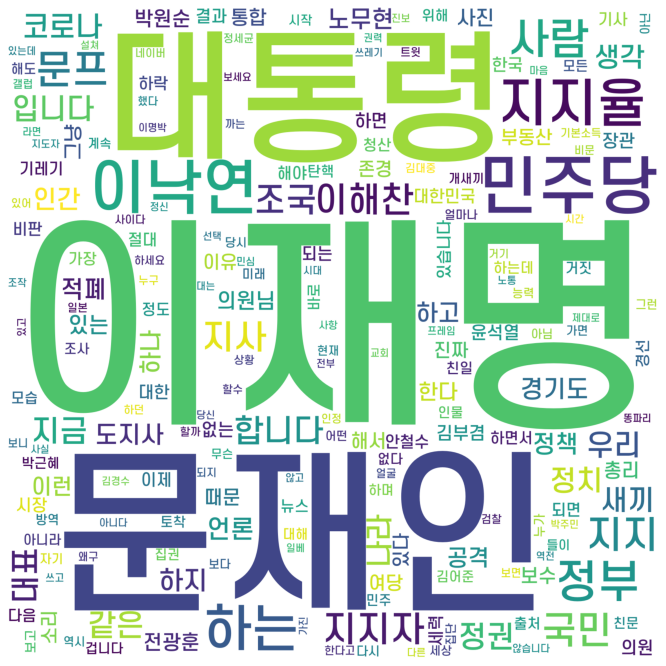

In [68]:
# 문재인 언급 트윗 워드클라우드
gen = wc.generate_from_frequencies(moon_word)
fig = plt.figure(figsize = (12,12))
plt.axis('off')
plt.imshow(gen)
plt.show()

문재인을 언급한 트윗을 워드클라우드로 시각화한 결과, 인물 3명과 더불어 민주당, 대통령, 지지율 등의 단어가 많이 언급되었다.

'사람'의 경우 대선 당시 문재인 캠프의 슬로건이었던 '사람이 먼저다'로 인해 많이 언급된 것으로 보인다.

그 외에도 부동산, 통합 등 대통령 재임 기간의 주요 이슈들이 많이 언급된 것을 확인할 수 있다.

또한 이재명, 이낙연 언급 트윗 워드클라우드와 문재인 언급 트윗 워드클라우드를 비교했을 때 후자에서는 빈 공간이 비교적 많이 보인다.

이는 앞서 확인했던 언급량에서 최소 2배 이상 차이가 나기 때문에 발생한 것으로 볼 수 있다.

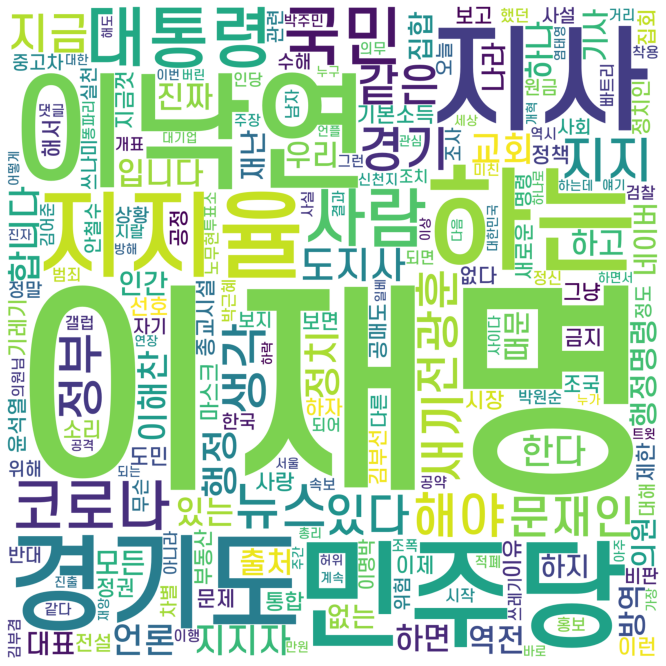

In [69]:
# 이재명 언급 트윗 워드클라우드
gen = wc.generate_from_frequencies(leej_word)
fig = plt.figure(figsize = (12,12))
plt.axis('off')
plt.imshow(gen)
plt.show()

이재명을 언급한 트윗을 워드클라우드로 시각화한 결과, 인물 3명과 더불어 민주당, 경기도, 지지율 등의 단어가 많이 언급되었다.

'지사' '도지사'의 경우, 경기도지사로 재임했기 때문에 '경기도'와 함께 많이 언급된 것으로 보인다.

2020년 8월 18일, 이재명 경기도지사가 마스크 착용 행정명령을 내린 것으로 인해 '행정명령' '행정' 등의 단어가 언급된 것으로 보인다.

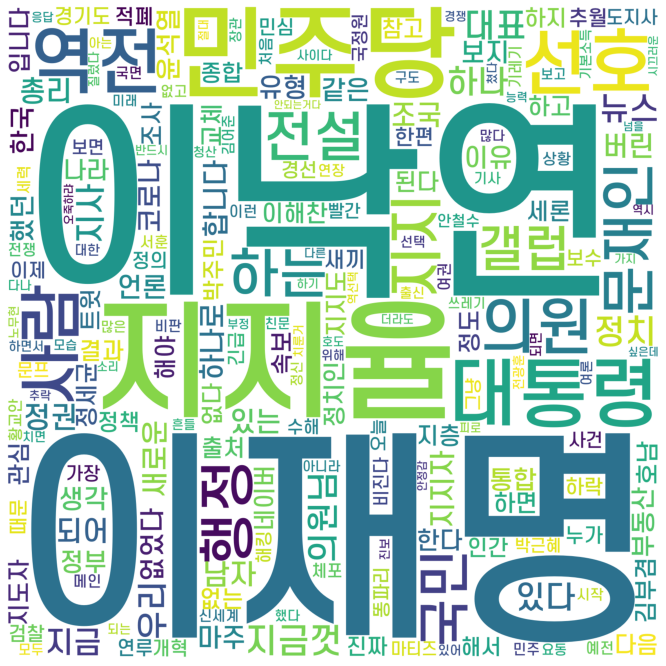

In [70]:
# 이낙연 언급 트윗 워드클라우드
gen = wc.generate_from_frequencies(leen_word)
fig = plt.figure(figsize = (12,12))
plt.axis('off')
plt.imshow(gen)
plt.show()

이낙연을 언급한 트윗을 워드클라우드로 시각화한 결과, 인물 3명과 더불어 민주당, 지지율, 역전 등의 단어가 많이 언급되었다.

'역전'의 경우 2020년 8월 14일 차기 대통령 선호도 결과에서 이재명 경기도지사 선호도가 처음으로 이낙연 의원을 앞질러 언급된 것으로 보인다.

또한, 이낙연과 이재명의 글자 크기가 유사한 것으로 보아 이낙연을 언급한 트윗에서는 이재명을 비슷한 횟수로 언급했다고 볼 수 있다.

-----------------------------------------------------------------------------------------------------

데이터가 2020년 8월에 수집된 것을 고려했을 때, 후보에 관계없이 코로나가 많이 언급된 것을 알 수 있다.

#### 긍부정 분석
- 참고: https://somjang.tistory.com/entry/Keras%EA%B8%B0%EC%82%AC-%EC%A0%9C%EB%AA%A9%EC%9D%84-%EA%B0%80%EC%A7%80%EA%B3%A0-%EA%B8%8D%EC%A0%95-%EB%B6%80%EC%A0%95-%EC%A4%91%EB%A6%BD-%EB%B6%84%EB%A5%98%ED%95%98%EB%8A%94-%EB%AA%A8%EB%8D%B8-%EB%A7%8C%EB%93%A4%EC%96%B4%EB%B3%B4%EA%B8%B0
* 긍부정 단어 파일: 위 블로그의 긍부정 단어 파일에 분석가가 지정한 단어를 추가하여 사용

In [91]:
# 긍부정 단어 파일 불러오기
with open("./negative_words_self.txt", encoding = 'utf-8') as neg:
    negative = neg.readlines()
negative = [neg.replace("\n", "") for neg in negative]

with open("./positive_words_self.txt", encoding = 'utf-8') as pos:
    positive = pos.readlines()
positive = [pos.replace("\n", "") for pos in positive]

In [95]:
# 긍부정 단어에서 고유값만 남기기
negative = list(set(negative))
positive = list(set(positive))

In [96]:
print("부정 단어 개수는", len(negative), negative[:10])
print("긍정 단어 개수는", len(positive), positive[:10])

부정 단어 개수는 105 ['불만', '불매', '과징금', '포기', '벌레', '산재', '일베', '직격탄', '리스크', '냉담']
긍정 단어 개수는 57 ['착한가게', '입점', '인기', '기부', '호응', '순항', '체결', '봉사', '열풍', '선보여']


In [97]:
#각 인물의 트윗 데이터를 리스트로 변경
jaein_df = list(jaein['text_kr'])
jaemyung_df = list(jaemyung['text_kr'])
nakyon_df = list(nakyon['text_kr'])

In [113]:
def neg_pos(df):
    labels = []
    for i in df:
        for j in negative:
            n_count = i.count(j) # 부정단어 등장 횟수 계산
            break
        for j in positive:
            p_count = i.count(j) # 긍정단어 등장 횟수 계산
            break

        if n_count > p_count: # 긍정단어보다 부정단어가 많으면 -1로 라벨링
            label = -1 
        elif n_count < p_count: # 부정단어보다 긍정단어가 많으면 1로 라벨링
            label = 1 
        else: # 긍정단어와 부정단어 등장 횟수가 같으면 0으로 라벨링
            label = 0
            
        labels.append(label)
    return labels

In [116]:
# 사용자 정의 함수 적용
jaein['label'] = neg_pos(jaein_df)
jaemyung['label'] = neg_pos(jaemyung_df)
nakyon['label'] = neg_pos(nakyon_df)

C:\Users\User\AppData\Local\Temp\ipykernel_4180\1605523414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jaein['label'] = neg_pos(jaein_df)
C:\Users\User\AppData\Local\Temp\ipykernel_4180\1605523414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nakyon['label'] = neg_pos(nakyon_df)


In [138]:
from matplotlib import rc, font_manager
import platform
import matplotlib.pyplot as plt
%matplotlib inline

# 한글을 나타내기 위한 코드
font_path = 'C:\Windows\\Fonts\\malgun.ttf'

matplotlib.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = font_path).get_name()
    matplotlib.rc('font', family = font_name)
else:
    matplotlib.rc('font',family='AppleGothic')

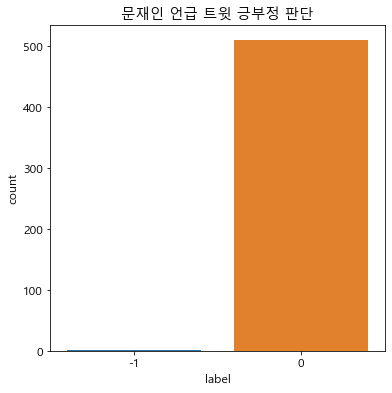

In [146]:
import seaborn as sns
from matplotlib import font_manager, rc

fig = plt.figure(figsize = (6,6))
plt.title("문재인 언급 트윗 긍부정 판단")
plt.rc('figure', titlesize = 12)
sns.countplot(x = jaein['label'])
plt.show()

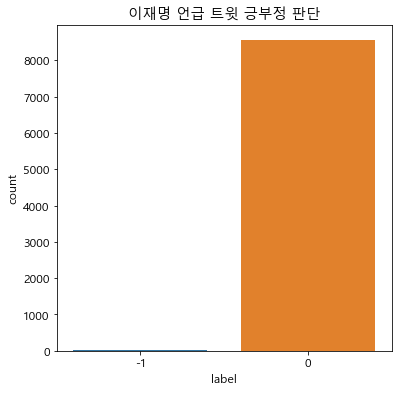

In [147]:
fig = plt.figure(figsize = (6,6))
plt.title("이재명 언급 트윗 긍부정 판단")
plt.rc('figure', titlesize = 12)
sns.countplot(x = jaemyung['label'])
plt.show()

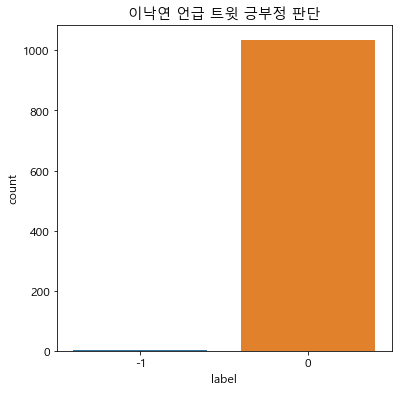

In [148]:
fig = plt.figure(figsize = (6,6))
plt.title("이낙연 언급 트윗 긍부정 판단")
plt.rc('figure', titlesize = 12)
sns.countplot(x = nakyon['label'])
plt.show()

인물별 트윗의 긍부정 여부를 시각화한 결과, 모든 인물의 데이터셋에서 중립으로 판단된 경우가 가장 많았다.

또한, 긍정으로 판단된 경우는 0건인 것으로 나타났다.

이는 긍부정 단어 개수의 차이(부정 105, 긍정 57) 혹은 데이터셋 자체의 특성으로 인한 것으로 추정된다.

추후 긍부정 단어 사전의 업데이트가 필요해보인다.

또한, 하나의 트윗에 여러 인물이 언급된 경우, 누구에 대한 긍정 혹은 부정적인 언급인지 판단하기가 어렵다

추후 분석을 위해서는 데이터를 나누는 과정에서 보다 세밀한 전처리 작업이 필요하다.